In [ ]:
y(t) = Level * Trend * Seasonality * Noise

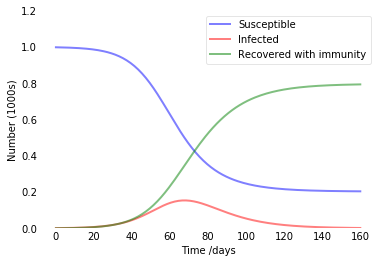

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sars = pd.read_csv('../data/sars_chn_agg.csv')

In [5]:
sars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          2538 non-null   object
 1   Country                       2538 non-null   object
 2   Cumulative_Number_Of_Case(s)  2538 non-null   int64 
 3   Number_Of_Deaths              2538 non-null   int64 
 4   Number_Recovered              2538 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 99.3+ KB


Text(0.5, 0, 'Date')

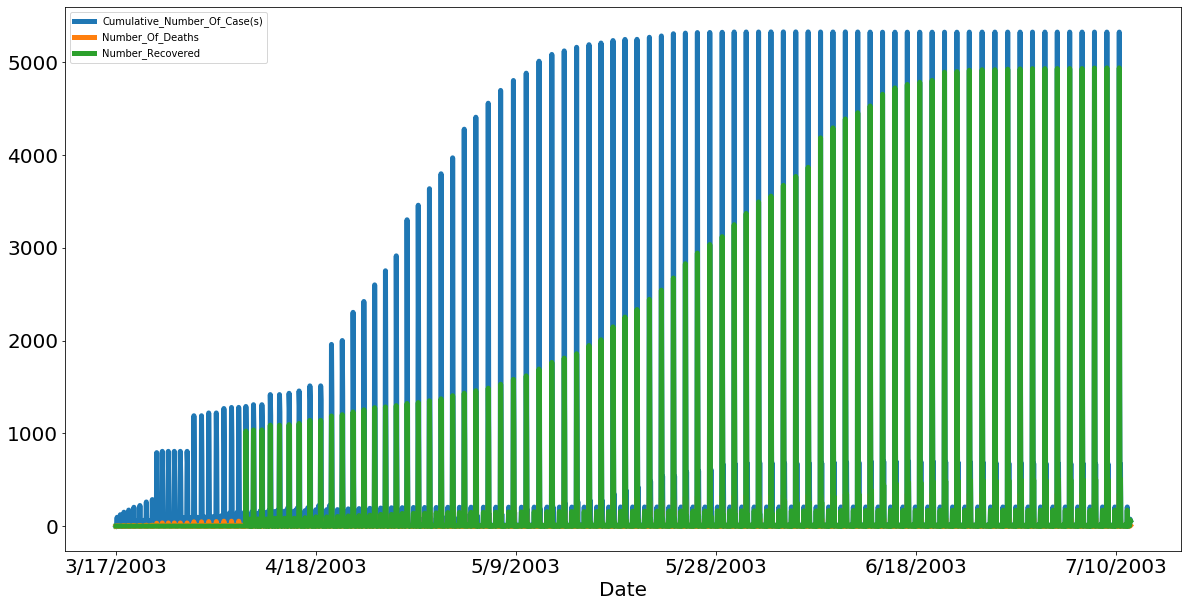

In [10]:
b = sars.set_index('Date')
b.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20)

In [41]:
# b['Number_Of_Deaths'].plot(figsize=(20,10), linewidth=5, fontsize=20)
# plt.xlabel('Date', fontsize=20)

In [64]:
c = sars.groupby('Date').agg({'Cumulative_Number_Of_Case(s)':'sum','Number_Of_Deaths':'sum','Number_Recovered':'sum'})

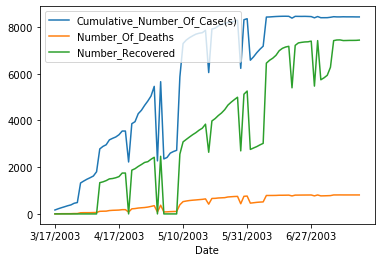

In [18]:
c.plot()

In [21]:
c.reset_index(inplace=True)

In [42]:
# sars.groupby(['Date']).agg('sum').plot()

In [65]:
ct = c['Cumulative_Number_Of_Case(s)']
cd = c['Number_Of_Deaths']
ce = c['Number_Recovered']

In [41]:
daily_cases = ct.diff().fillna(ct[0]).astype(np.int64)
daily_cases.head()

0    167
1    219
2    264
3    306
4    350
Name: Cumulative_Number_Of_Case(s), dtype: int64

In [40]:
# plt.plot(daily_cases)
# plt.title("Daily cases");

In [ ]:
X = c[['Cumulative_Number_Of_Case(s)', 'Number_Of_Deaths']]
y = 

In [47]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(c['Cumulative_Number_Of_Case(s)'], autolag='AIC')
dftest[1]

0.9917082388603854

In [39]:
# from statsmodels.tsa.stattools import acf, pacf
# ACF = acf(c['Cumulative_Number_Of_Case(s)'], nlags=1)
# PACF = pacf(c['Cumulative_Number_Of_Case(s)'], nlags=1, method='ols')
# print(ACF)
# print(PACF)

In [38]:
# from pandas import Series
# from matplotlib import pyplot
# from statsmodels.graphics.tsaplots import plot_acf
# series = c['Cumulative_Number_Of_Case(s)'].astype(float)
# plot_acf(series)
# pyplot.show()
# timeSeriesData = c['Cumulative_Number_Of_Case(s)']
# train = timeSeriesData[:int(0.9*(len(timeSeriesData)))]
# test = timeSeriesData[int(0.9*(len(timeSeriesData))):]

In [33]:
# fig, ax = plt.subplots()
# fig.set_size_inches(20, 10)
# plt.plot(train)

In [34]:
# fig, ax = plt.subplots()
# fig.set_size_inches(20, 10)
# plt.plot(train[1:100])

In [87]:
from statsmodels.tsa.arima_model import ARIMA


In [35]:
# from pandas.plotting import autocorrelation_plot
# autocorrelation_plot(d[['index','Cumulative_Number_Of_Ctase(s)']])

In [36]:
# autocorrelation_plot(d[['index','Cumulative_Number_Of_Case(s)','Number_Recovered','Number_Of_Deaths']])

In [69]:
d= c.reset_index()

In [83]:
a = d[d.columns[2]].diff()

In [37]:
# plt.plot(a.diff())

In [105]:
ArimaModel = ARIMA(d[['Cumulative_Number_Of_Case(s)']], order=(5,2,2))
ArimaFit = ArimaModel.fit()

In [44]:
# ab = a.diff().fillna(0)

In [113]:
ArimaFit.predict(start=len(d['index']), end=len(d['index']-1))

96    227.499666
dtype: float64

In [4]:

import tensorflow as tf

In [3]:
d = sars.reset_index()

In [10]:
train = d['Cumulative_Number_Of_Case(s)'][:75]
test = d['Cumulative_Number_Of_Case(s)'][75:]

In [31]:

# X_train = tf.keras.utils.normalize(train, axis=1)
# X_test = tf.keras.utils.normalize(test, axis=1)
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1,activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(28, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(1, activation=tf.nn.softmax))
# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=4)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = d[['index']]
y = d['Cumulative_Number_Of_Case(s)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [12]:
logistic_Model = LogisticRegression(random_state=0).fit(X, y)
logistic_Model.predict(X_train)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [11]:
logistic_Model.score(X,y)

0.3404255319148936

In [14]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)

In [18]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(x_normalized, y, test_size=0.33, random_state=42)

In [20]:
logistic_Model = LogisticRegression(random_state=0).fit(x_normalized, y)
logistic_Model.predict(Xn_train)
logistic_Model.score(x_normalized,y)

0.3408195429472025

In [21]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X_scale = scaler.transform(X)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_scale, y, test_size=0.33, random_state=42)
logistic_Model = LogisticRegression(random_state=0).fit(X_scale, y)
logistic_Model.predict(Xs_train)
logistic_Model.score(X_scale,y)

0.3408195429472025

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
sars_knn = kmeans.fit(X,y)
y_knn = sars_knn.predict(X_train)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train,y_knn)
acc

0.12941176470588237

In [48]:
# X = sars.reset_index()[['index']]
# y = sars['Cumulative_Number_Of_Case(s)']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# S_kmeans = KMeans(n_clusters=4)
# sars_knn_S = kmeans.fit(X,y)
# y_knn_S = sars_knn_S.predict(X_train)
# from sklearn.metrics import accuracy_score
# acc = accuracy_score(y_train,y_knn_S)
# acc

In [110]:
from keras import models, layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# for ind,val in ennumerate(data['Passengers']):
X = d[['index']]
y = d['Cumulative_Number_Of_Case(s)']
vals = list(y)
ts = pd.DataFrame()
while len(vals)>3:
    temp = pd.DataFrame([vals[0],vals[1],vals[2],vals[3]]).T
    ts = pd.concat([ts,temp], axis=0)
    del vals[0]
ts = ts.reset_index().drop(['index'], axis=1)
ts.head()   

,0,1,2,3
0,1,8,20,95
1,8,20,95,2
2,20,95,2,1
3,95,2,1,40
4,2,1,40,2


In [120]:
scaler = MinMaxScaler()
scaler.fit(ts[[3]])
scaled = scaler.transform(ts[[3]])
ts['scaled'] = scaled
ts.head()

,0,1,2,3,scaled
0,1,8,20,95,0.017827
1,8,20,95,2,0.000375
2,20,95,2,1,0.000188
3,95,2,1,40,0.007506
4,2,1,40,2,0.000375


In [112]:
training_data = ts.head(100)
test_data = ts.tail(40)

In [121]:
model = models.Sequential()
model.add(layers.Dense(3, activation='relu',input_shape=(4,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [122]:
history = model.fit(training_data[[0,1,2,3]], training_data['scaled'],
              epochs=10, batch_size=1, verbose=0)
val_mse, val_mae = model.evaluate(test_data[[0,1,2,3]], test_data['scaled'], verbose=0)
val_mae

1.5307121276855469

In [79]:
predictions = model.predict(test_data[[0,1,2,3]])

In [80]:
scaler.inverse_transform(predictions)[0:10]

array([[118814.13   ],
       [158080.11   ],
       [ 17181.676  ],
       [   678.0079 ],
       [  1806.6842 ],
       [  2025.0813 ],
       [   509.98608],
       [   547.5125 ],
       [   596.0408 ],
       [   491.27667]], dtype=float32)

In [81]:
scaler.inverse_transform(test_data[['scaled']])[0:10]

array([[206.],
       [  1.],
       [  1.],
       [  3.],
       [  1.],
       [  9.],
       [  4.],
       [ 75.],
       [ 63.],
       [  1.]])

In [82]:
X.rolling(20)

Rolling [window=20,center=False,axis=0]

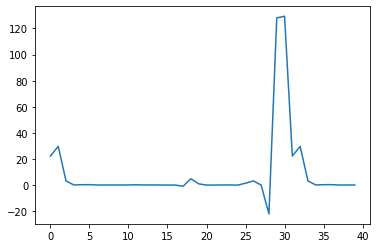

In [83]:
plt.plot(predictions)


In [108]:
e = c.reset_index().rename(columns={'index':'ticks','Cumulative_Number_Of_Case(s)':'case'})
e['rollmean'] = e.case.rolling(window=2).mean()

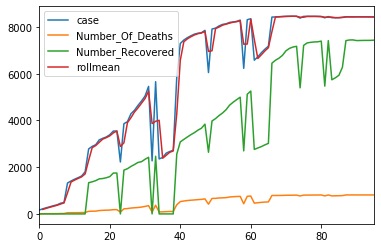

In [109]:
e.plot()